In [1]:
import numpy as np
import pandas as pd 
import tensorflow as tf

from pathlib import Path
from matplotlib import pyplot as plt 

## IMPORT & EXPLORE

#### FUNCTIONS

In [2]:
def directory_files( directory,
                     item_type = None):

    directory_files = sorted([ str(path) for path in directory.glob(f'*.{item_type}') ])

    return directory_files

In [3]:
def xray_labeling( files ):

    labels = [ 0 if 'Normal' in path else
               1 if 'Tuberculosis' in path 
               else -1 for path in files]
    
    return np.array(labels)

In [4]:
def load_images(image_paths, target_size=(224, 224)):
    loaded_images = []
    for path in image_paths:
        try:
            # Read and decode the image as grayscale (force 1 channel)
            image = tf.io.read_file(path)
            image = tf.image.decode_image(image, channels=1)  # Force grayscale format

            # Resize the image to the target size
            image = tf.image.resize(image, target_size)

            # Normalize the pixel values to [0, 1]
            image = image / 255.0

            # Set the shape explicitly to ensure consistency
            image.set_shape((target_size[0], target_size[1], 1))

            loaded_images.append(image)
        except Exception as e:
            print(f"Error loading image at {path}: {e}")

    return loaded_images

In [5]:
def display_examples(images, labels, num_examples=5):
    plt.figure(figsize=(10, 10))
    
    for i in range(num_examples):
        ax = plt.subplot(1, num_examples, i + 1)
        ax.imshow(images[i])  # Display the image
        ax.set_title(f"Label: {labels[i]}")  # Display the label
        ax.axis("off")  # Hide axes
    
    plt.show()

#### IMAGE DIRECTORY

In [10]:
normal_xray_scans_directory = Path(r"C:\Users\User\Desktop\LungXrayCT-Disease-Detection(TB MODEL)\data\images\Normal")
tb_xray_scans_directory = Path(r"C:\Users\User\Desktop\LungXrayCT-Disease-Detection(TB MODEL)\data\images\Tuberculosis")

In [11]:
normal_xray_scans_directory_files = directory_files( directory = normal_xray_scans_directory,item_type = 'jpeg') + directory_files( directory = normal_xray_scans_directory,item_type = 'png') 
tb_xray_scans_directory_files = directory_files( directory = tb_xray_scans_directory,item_type = 'jpeg') +  directory_files( directory = tb_xray_scans_directory,item_type = 'png')


lung_xray_scans_directory_files = pd.Series( (normal_xray_scans_directory_files + tb_xray_scans_directory_files) ).sample(frac = 1,
                                                                                                                          replace = False ,
                                                                                                                          random_state = 42)


In [12]:
lung_xray_scans_directory_files = list(lung_xray_scans_directory_files)

len(lung_xray_scans_directory_files)


4200

#### LABELING

In [14]:
lung_xray_scans_labels = xray_labeling( lung_xray_scans_directory_files )

In [16]:
pd.Series(lung_xray_scans_labels).value_counts()

0    3500
1     700
Name: count, dtype: int64

#### CONVERTING

In [17]:
lung_xray_scans = np.array(load_images( image_paths = lung_xray_scans_directory_files ) )
lung_xray_scans_labels = lung_xray_scans_labels

#### DISPLAY

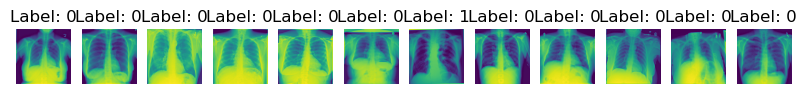

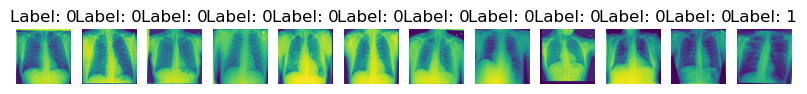

In [18]:
display_examples(images = lung_xray_scans, 
                 labels = lung_xray_scans_labels, 
                 num_examples=12)
display_examples(images = lung_xray_scans[42:], 
                 labels = lung_xray_scans_labels[42:], 
                 num_examples=12)

## SAVE

In [19]:
np.savez_compressed(
    'tuberculosis_detection.npz',
     images = lung_xray_scans ,
     labels = lung_xray_scans_labels
)

In [20]:
#### TEST LOADING

lung_xray_scans = np.load(r"C:\Users\User\Desktop\LungXrayCT-Disease-Detection(TB MODEL)\data\arrays\tuberculosis_detection.npz")['images']
lung_xray_scans_labels = np.load(r"C:\Users\User\Desktop\LungXrayCT-Disease-Detection(TB MODEL)\data\arrays\tuberculosis_detection.npz")['labels']


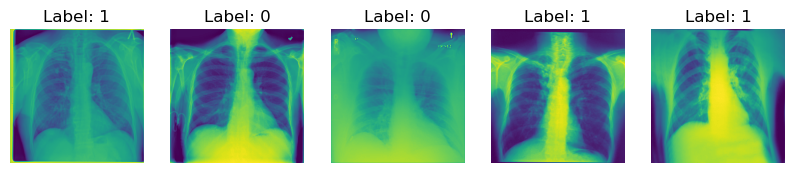

In [30]:
display_examples(images = lung_xray_scans[92:], 
                 labels = lung_xray_scans_labels[92:], 
                 num_examples=5)